### Notebook for running SONATA on scNMT dataset
Below, we replicate our results for scNMT dataset reported in *Securing diagonal integration of multimodal single-cell data against ambiguous mapping*




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.dirname(os.getcwd()))
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load parameters and datasets
with open("./cfgs/scNMT.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)
        
data_url1 = os.path.join(params.data_path, params.data_url1)
data_url2 = os.path.join(params.data_path, params.data_url2)
print("data url1 = {}\ndata url2 = {}".format(data_url1, data_url2))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params.data_path, params.label_url1)
label_url2 = os.path.join(params.data_path, params.label_url2)
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params.norm: 
        data1 = normalize(data1, norm=params.norm)
        data2 = normalize(data2, norm=params.norm)

if params.sort_label: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)

print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))

modality1_name = "Chromatin Accessibility"
modality2_name = "DNA Methylation"
label_name = ["E5.5", "E6.5", "E7.5"]

data url1 = ../../data/scNMT/Paccessibility_300.txt
data url2 = ../../data/scNMT/Pmethylation_300.txt
data size: data1 = (612, 300), data2 = (709, 300)
data1 shape=(612, 300)	data2 shape=(709, 300)
label1 shape=(612,)	label2 shape=(709,)


### 1. visualize two modalities

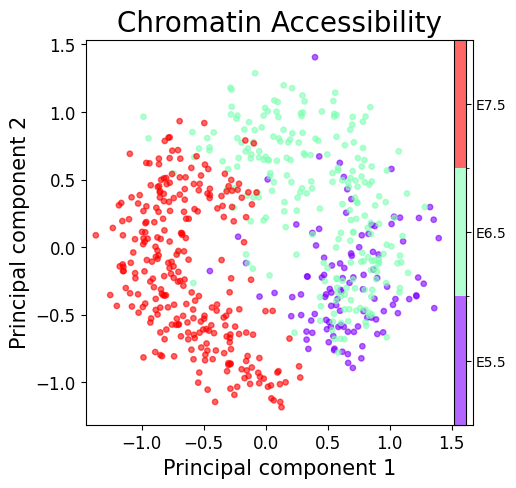

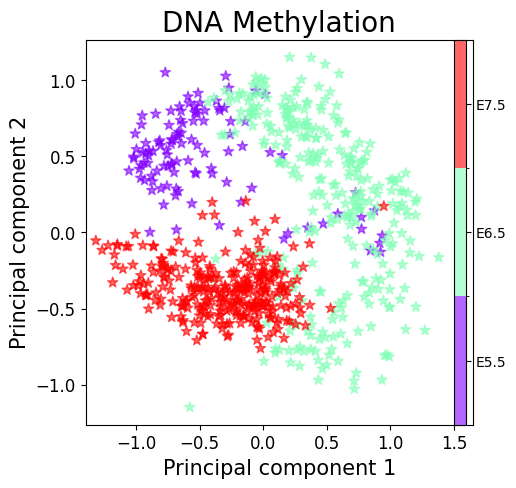

In [3]:
plt_domain_bio_labels(data1, label1, title=modality1_name, y_tick_labels=label_name, marker='.', a=0.6, show=True)
plt_domain_bio_labels(data2, label2, title=modality2_name, y_tick_labels=label_name, marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

##### 2.1 Diagnose Modality1

There are multiple types of ambiguous groups in scNMT, so we use the **diagnose_by_group** function to detect them. Here, we simply clustering the mapping results from all the iters, and use an elbow method to find the optimal 

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 10%|█         | 1/10 [02:58<26:49, 178.87s/it]/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 20%|██        | 2/10 [07:13<29:47, 223.48s/i

cannot_link shape=24123
data_shape = (612, 300)
k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
cannot_link shape=20125
data_shape = (548, 300)
k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
Ambiguous type: 0


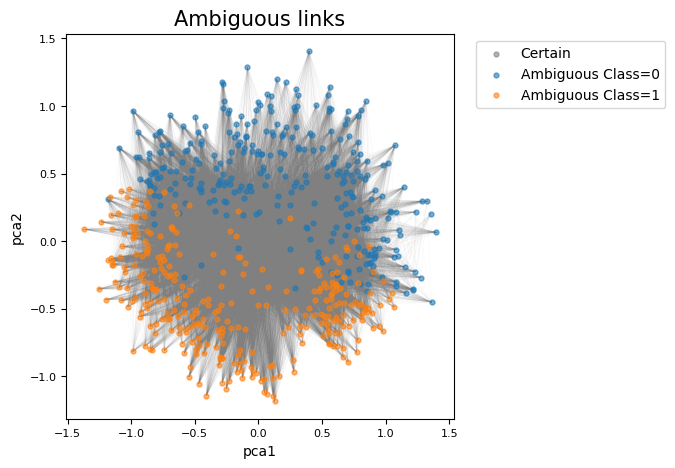

Ambiguous type: 1


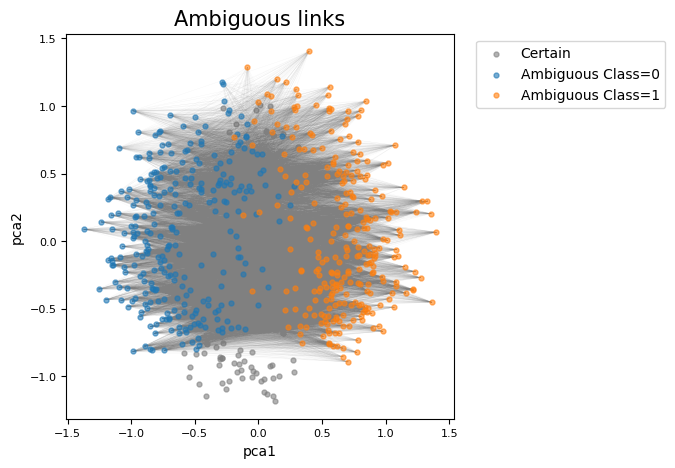

In [4]:
sn1 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, 
                    e=params.e, mode=params.mode, metric=params.metric, verbose=False)
DiagnoseResult1 = sn1.diagnose_by_groups(data1, save_dir=os.path.join(params.save_dir, "Modality1"))

# visualize the results
for idx, DiagnoseResult in enumerate(DiagnoseResult1):
    print("Ambiguous type: {}".format(idx))
    plt_cannotlink_by_labelcolor(data1, DiagnoseResult.ambiguous_idx, DiagnoseResult.ambiguous_labels, DiagnoseResult.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

#### 2.2 Diagnose Modality 2

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_neighbor=10, noise_scale=0.7, scaleOT = False, scale_sample_rate = 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

---------------OT Alignment Iter=0--------------
It.  |Err         
-------------------
    0|2.586384e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.762546e-05|
   20|1.118868e-07|
   30|6.071495e-10|


 10%|█         | 1/10 [01:41<15:17, 101.96s/it]

---------------OT Alignment Iter=1--------------
It.  |Err         
-------------------
    0|2.534574e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.643463e-04|
   20|4.717626e-04|
   30|6.996170e-04|
   40|7.657124e-04|
   50|6.270052e-04|
   60|3.038132e-04|
   70|1.055316e-04|
   80|2.951458e-05|
   90|7.873352e-06|
  100|2.080486e-06|
  110|5.485253e-07|
  120|1.445374e-07|
  130|3.808015e-08|
  140|1.003229e-08|
  150|2.643001e-09|
  160|6.962949e-10|


 20%|██        | 2/10 [06:11<26:44, 200.57s/it]

---------------OT Alignment Iter=2--------------
It.  |Err         
-------------------
    0|2.745529e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.037348e-03|
   20|2.856171e-04|
   30|1.516408e-04|
   40|9.485502e-05|
   50|5.558702e-05|
   60|3.039687e-05|
   70|1.614307e-05|
   80|8.483052e-06|
   90|4.439964e-06|
  100|2.319962e-06|
  110|1.211301e-06|
  120|6.322135e-07|
  130|3.299101e-07|
  140|1.721420e-07|
  150|8.981670e-08|
  160|4.686153e-08|
  170|2.444951e-08|
  180|1.275619e-08|
  190|6.655338e-09|
It.  |Err         
-------------------
  200|3.472311e-09|
  210|1.811618e-09|
  220|9.451797e-10|


 30%|███       | 3/10 [08:05<18:45, 160.83s/it]

---------------OT Alignment Iter=3--------------
It.  |Err         
-------------------
    0|2.626652e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|3.177996e-05|
   20|5.514272e-07|
   30|9.571317e-09|
   40|1.661154e-10|


 40%|████      | 4/10 [08:26<10:34, 105.81s/it]

---------------OT Alignment Iter=4--------------
It.  |Err         
-------------------
    0|2.486695e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|3.171710e-03|
   20|1.898308e-05|
   30|1.381891e-07|
   40|1.033826e-09|
   50|7.733623e-12|


 50%|█████     | 5/10 [08:50<06:20, 76.16s/it] 

---------------OT Alignment Iter=5--------------
It.  |Err         
-------------------
    0|2.575747e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.499744e-05|
   20|2.021460e-08|
   30|3.411550e-10|


 60%|██████    | 6/10 [09:04<03:40, 55.19s/it]

---------------OT Alignment Iter=6--------------
It.  |Err         
-------------------
    0|2.392359e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|5.119005e-05|
   20|2.313026e-07|
   30|1.075789e-09|
   40|5.008261e-12|


 70%|███████   | 7/10 [09:26<02:13, 44.44s/it]

---------------OT Alignment Iter=7--------------
It.  |Err         
-------------------
    0|2.509920e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.439947e-04|
   20|4.171845e-06|
   30|1.248390e-07|
   40|3.733676e-09|
   50|1.116643e-10|


 80%|████████  | 8/10 [09:52<01:16, 38.29s/it]

---------------OT Alignment Iter=8--------------
It.  |Err         
-------------------
    0|2.423164e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|6.527794e-04|
   20|2.738274e-04|
   30|1.206934e-04|
   40|6.241227e-05|
   50|3.481816e-05|
   60|1.998585e-05|
   70|1.160447e-05|
   80|6.771156e-06|
   90|3.959770e-06|
  100|2.318174e-06|
  110|1.357883e-06|
  120|7.956230e-07|
  130|4.662551e-07|
  140|2.732626e-07|
  150|1.601622e-07|
  160|9.387572e-08|
  170|5.502427e-08|
  180|3.225224e-08|
  190|1.890463e-08|
It.  |Err         
-------------------
  200|1.108097e-08|
  210|6.495142e-09|
  220|3.807149e-09|
  230|2.231575e-09|
  240|1.308046e-09|
  250|7.667169e-10|


 90%|█████████ | 9/10 [12:18<01:12, 72.25s/it]

---------------OT Alignment Iter=9--------------
It.  |Err         
-------------------
    0|2.583179e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.111084e-04|
   20|4.380802e-06|
   30|9.795860e-08|
   40|2.193012e-09|
   50|4.909653e-11|


100%|██████████| 10/10 [12:43<00:00, 76.39s/it]


---------------Coupling Denoising Iter=0--------------
---------------Coupling Denoising Iter=1--------------
---------------Coupling Denoising Iter=2--------------
---------------Coupling Denoising Iter=3--------------
---------------Coupling Denoising Iter=4--------------
---------------Coupling Denoising Iter=5--------------
---------------Coupling Denoising Iter=6--------------
---------------Coupling Denoising Iter=7--------------
---------------Coupling Denoising Iter=8--------------
---------------Coupling Denoising Iter=9--------------
Outlier cluster indices=[ 24  82  86  93 101 141 150 167 206 263 279 280 294 302 303 340 346 347
 348 400 404 407]
iter=0	include_indices=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76

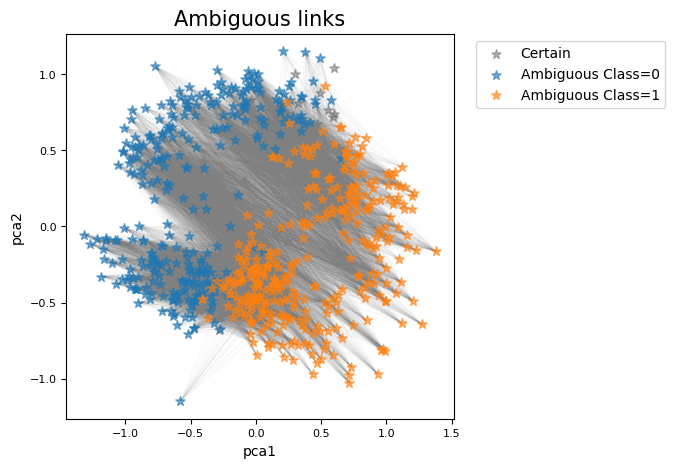

In [5]:
sn2 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, mode=params.mode, metric=params.metric,)
DiagnoseResult2 = sn2.diagnose(data2, save_dir=os.path.join(params.save_dir, "Modality2"))

# visualize the diagnose results
plt_cannotlink_by_labelcolor(data2, DiagnoseResult2.ambiguous_idx, DiagnoseResult2.ambiguous_labels, DiagnoseResult2.cannot_links, alpha=0.6, cl_alpha = 0.1, marker='*', show=True)

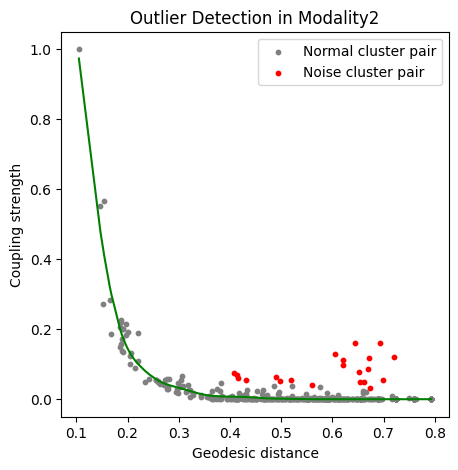

In [6]:
scatter_x = sn2.spline_data.spline_dist
scatter_y = sn2.spline_data.spline_coupling
include_indices = sn2.spline_data.include_indices
exclude_indices = sn2.spline_data.exclude_indices
spline_x = sn2.spline_data.spline_x
spline_y = sn2.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality2", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

It.  |Err         
-------------------
    0|1.429656e-03|
   10|9.456000e-04|
   20|1.218894e-04|
   30|1.011103e-04|
   40|8.432593e-05|
   50|7.035454e-05|
   60|5.864088e-05|
   70|4.899508e-05|
   80|4.111509e-05|
   90|3.460438e-05|
  100|2.912853e-05|
  110|2.445954e-05|
  120|2.045437e-05|
  130|1.702100e-05|
  140|1.409248e-05|
  150|1.161221e-05|
  160|9.527532e-06|
  170|7.788095e-06|
  180|6.346181e-06|
  190|5.157627e-06|
It.  |Err         
-------------------
  200|4.182563e-06|
  210|3.385792e-06|
  220|2.736820e-06|
  230|2.209625e-06|
  240|1.782277e-06|
  250|1.436465e-06|
  260|1.157027e-06|
  270|9.314793e-07|
  280|7.495942e-07|
  290|6.030276e-07|
  300|4.849911e-07|
  310|3.899764e-07|
  320|3.135226e-07|
  330|2.520228e-07|
  340|2.025644e-07|
  350|1.627975e-07|
  360|1.308283e-07|
  370|1.051309e-07|
  380|8.447721e-08|
  390|6.787854e-08|
It.  |Err         
-------------------
  400|5.453968e-08|
  410|4.382100e-08|
  420|3.520819e-08|
  430|2.828775e-08|
  4

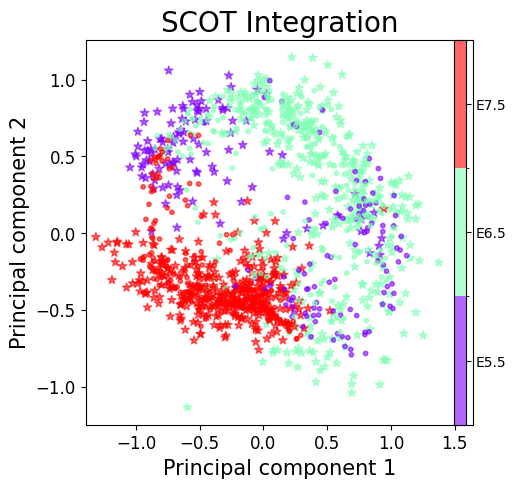

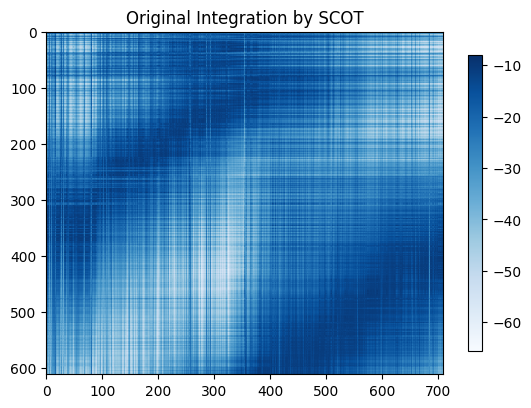

In [7]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = 120, e=5e-3, mode=params.mode, metric=params.metric, normalize=params.norm)
mapping = scot.coupling

plt_mapping_bio_labels(x_aligned, y_aligned, label1, label2, modality1_name, modality2_name, label_name, 
                       suptitle = "SCOT Integration", a = 0.6, show=True) 
plt_heatmap(np.log(mapping), title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

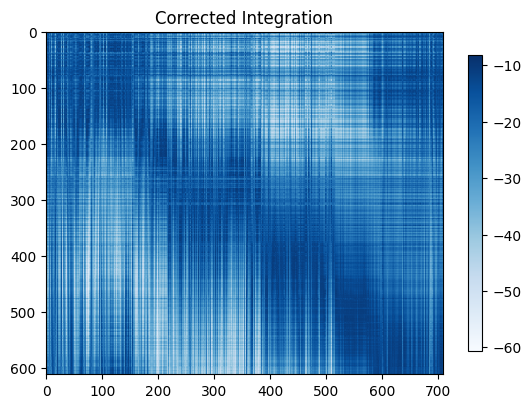

In [8]:
# check all ambiguous groups in both modalities
acc_best_global=0
for data, DiagnoseResult, modality in [(data1, DiagnoseResult1[0], 1), (data1, DiagnoseResult1[1], 1), (data2, DiagnoseResult2, 2)]:
    alter_mappings = sonata.map_ambiguous_groups(data, DiagnoseResult.ambiguous_labels, DiagnoseResult.ambiguous_idx)
    x_aligned_best, y_aligned_best, best_mapping, acc_best = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping, modality)

    if acc_best_global < acc_best:
        x_aligned_best_global = x_aligned_best
        y_aligned_best_global = y_aligned_best
        best_mapping_global = best_mapping

plt_heatmap(np.log(best_mapping_global), title="Corrected Integration", show=True)